#### Implementing DBScan Algorithm:
this algorithm helps you identify noise or outliers which is hard to do with
the help of Kmeans or Hierarchical Means algorithm:
Important Concept of DBSCAN:
1) Epsilon Value:
2) Min Point:
3) Red Point:
4) Yellow Point:
5) Blue Point:

In [165]:
#loading all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from sklearn.cluster import DBSCAN
from pandas_profiling import ProfileReport
warnings.filterwarnings('ignore')
from sklearn import metrics

#### loading the dataset from kaggle

In [166]:
df=pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')

In [167]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Make the problem statement easier for understanding and visualization
to make the visualisation simpler, we are going to select only 2 features out of 5 as the data can't be visualized on 5 dimensions
Therefore, selected features are: Annual Income and Spending Score

In [168]:
X=df.iloc[:,[3,4]].values
len(X)

200

<AxesSubplot:xlabel='x', ylabel='y'>

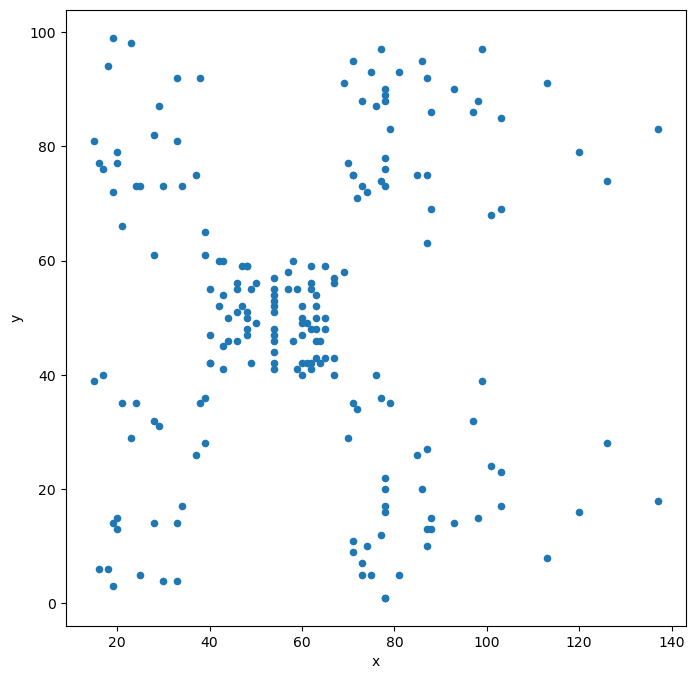

In [169]:
df1=pd.DataFrame(dict(x=X[:,0],y=X[:,1]))
fig,ax=plt.subplots(figsize=(8,8))
df1.plot(ax=ax,kind='scatter',x='x',y='y')
# visualizing how points are scattered

#### Apply DBSCAN Algorithm:
here we are going to apply DBSCAN algorithm which will find the labels of the
data points. the main difference between DBSCAN and Kmeans/Hierarchical means algorithm
is the its ability to identify noise/outlier and put them in a seperate cluster
to enable us to detect and discard outliers

In [170]:
dbscan=DBSCAN(eps=3,min_samples=4)
model=dbscan.fit(X)
clusters=model.labels_

#### Parameters:
the value of Epsilon and min_samples should be chosen by domain expertise
but here we are taking a general rule of choosing min_sample that should be equal to 
greater than the data set dimensions.

In [171]:
print(len(set(clusters)))
print(set(clusters))

10
{0, 1, 2, 3, 4, 5, 6, 7, 8, -1}


In [174]:
sample_cores=np.zeros_like(clusters,dtype=bool)
sample_cores[dbscan.core_sample_indices_]=True
n_clusters=len(set(clusters))- (1 if -1 in clusters else 0)

In [175]:
n_clusters

9

In [176]:
metrics.silhouette_score(X,clusters)

-0.1908319132560097